In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
import pickle

In [5]:
data=pd.read_csv("car data.csv")

In [6]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data.shape

(301, 9)

In [8]:
# number of categories in each column
print(data["Seller_Type"].unique())
print(data["Fuel_Type"].unique())
print(data["Transmission"].unique())
print(data["Car_Name"].nunique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
98


In [9]:
# checking is there any null value
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
def no_year(x):
    return x-2021

In [12]:
data["no_year"]=data["Year"].map(lambda x:no_year(x))

In [13]:
data.drop(columns=["Year","Car_Name"],inplace=True)

In [14]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,-7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,-8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,-4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,-10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,-7


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
 7   no_year        301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [16]:
data=pd.get_dummies(data,drop_first=True)

In [17]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,-7,0,1,0,1
1,4.75,9.54,43000,0,-8,1,0,0,1
2,7.25,9.85,6900,0,-4,0,1,0,1
3,2.85,4.15,5200,0,-10,0,1,0,1
4,4.60,6.87,42450,0,-7,1,0,0,1


In [18]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,-0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,-0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,-0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,0.236141,-0.047584,-0.524342,-0.182104,1.000000,0.064315,-0.059959,-0.039896,0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,-0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,-0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,0.000394,-0.098643,0.091013,0.063240,1.000000


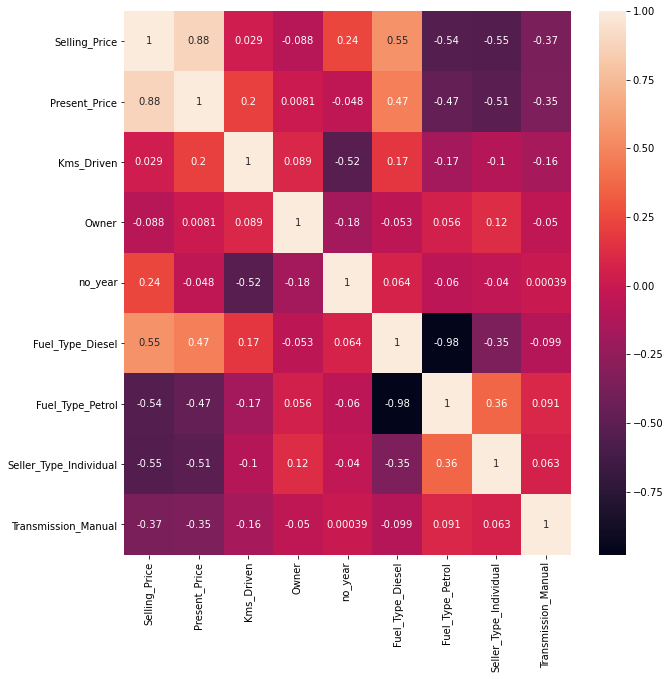

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [20]:
# in this heatmap we find that selling price and present price are more correlated

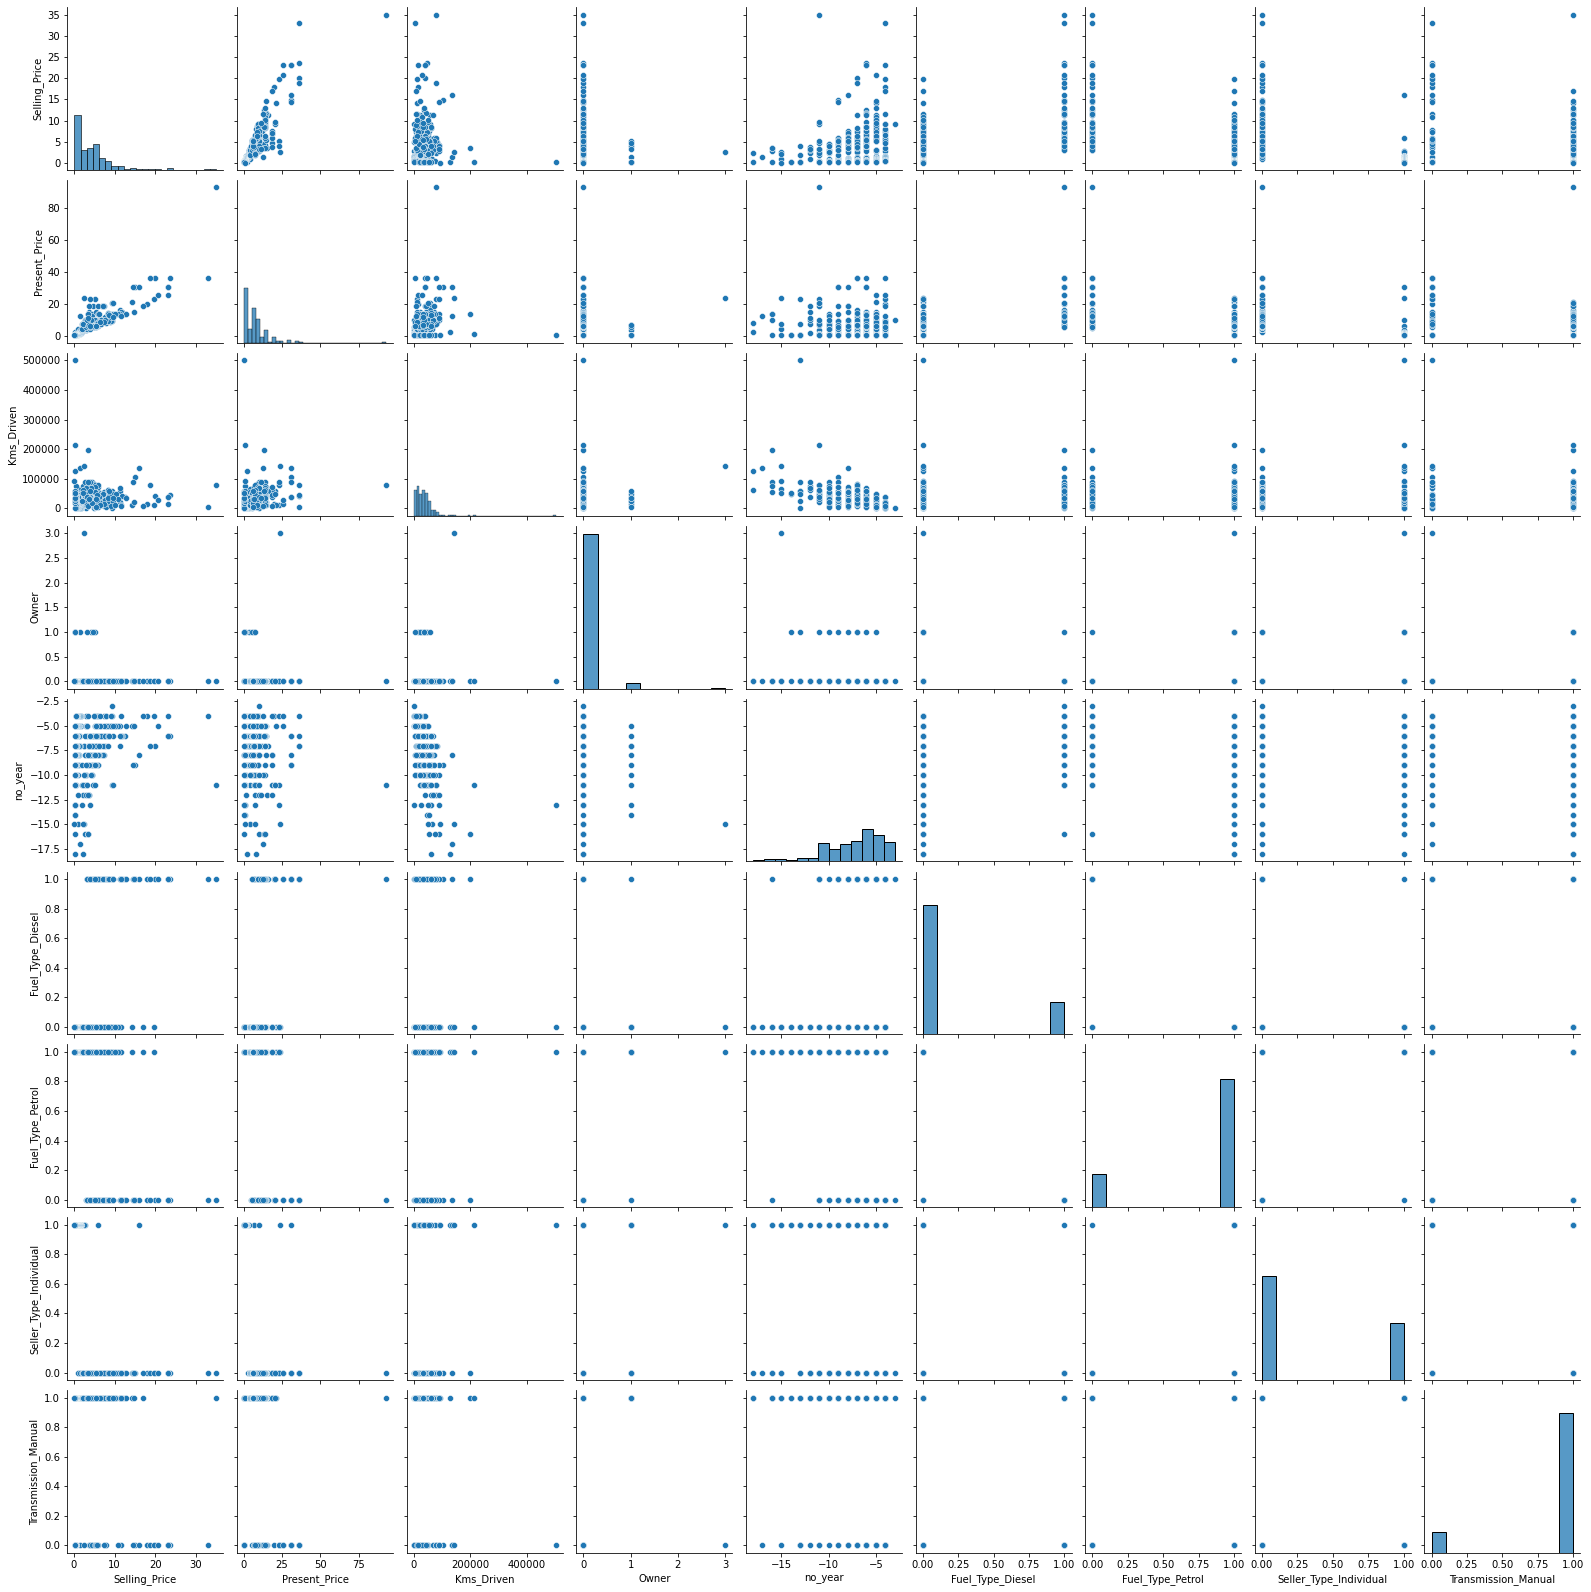

In [21]:
sns.pairplot(data)
plt.show()

In [22]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,-7,0,1,0,1
1,4.75,9.54,43000,0,-8,1,0,0,1
2,7.25,9.85,6900,0,-4,0,1,0,1
3,2.85,4.15,5200,0,-10,0,1,0,1
4,4.60,6.87,42450,0,-7,1,0,0,1


In [23]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [24]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,-7,0,1,0,1
1,9.54,43000,0,-8,1,0,0,1
2,9.85,6900,0,-4,0,1,0,1
3,4.15,5200,0,-10,0,1,0,1
4,6.87,42450,0,-7,1,0,0,1


In [25]:
# feature importance
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.41642256 0.04336165 0.0008738  0.07852133 0.20310996 0.00981853
 0.1303933  0.11749886]


[]

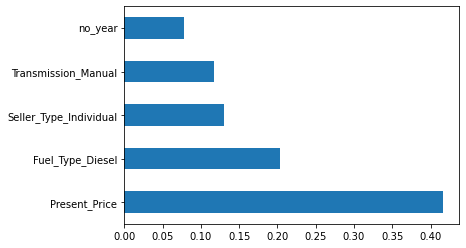

In [27]:
# plot the feature importance for better visualisation
feature_importance=pd.Series(model.feature_importances_,index=x.columns)
feature_importance.nlargest(n=5).plot(kind="barh")
plt.plot()

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.20)

In [29]:
model=RandomForestRegressor()

In [30]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
model.score(x_test,y_test)

0.9603913966792511

In [32]:
model.score(x_train,y_train)

0.9883143736709357

In [33]:
# Randomized serach CV
#  number of trees in random fores
n_estimators=[int(x) for x in np.linspace(100,1000,12)]
# maximum number of levels in the tree
max_depth=[int(x) for x in np.linspace(5,30,6)]
# number of features to consider in every split
max_features=["auto", "sqrt"]
# minimum number of samples at each leaf node
min_samples_leaf=[1,2,5,10]
# minimum number of samples to split a node
min_samples_split=[2,5,10,13,100]


In [34]:
# create the random_grid
param_grid={"n_estimators":n_estimators,
           "max_depth":max_depth,
            "max_features":max_features,
            "min_samples_leaf":min_samples_leaf,
            "min_samples_split":min_samples_split
            
           }

In [35]:
# first create the base model random forest regressor
rf=RandomForestRegressor()

In [36]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,scoring="neg_mean_squared_error"
                             ,random_state=0,verbose=2,n_jobs=1,cv=5,n_iter=10)

In [37]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=754; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=754; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=754; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=754; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=754; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=345; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=345; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 13,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [38]:
rf_random.best_params_

{'n_estimators': 181,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [39]:
rf_random.best_score_

-2.5566385711317765

In [40]:
predictions=rf_random.predict(x_test)

In [41]:
predictions

array([ 6.93683184,  0.48960306,  4.73831163,  8.97465376, 14.49576307,
        5.2601664 ,  3.23093035,  0.4537339 ,  3.94572262,  4.95213551,
        2.81810138,  0.72516816,  4.85693239,  7.17719477,  7.69745392,
       14.34131616,  6.70757897,  3.98392457,  0.44966746,  1.54656297,
        3.18436344,  4.94825463,  5.34595984,  9.9296461 ,  0.19212464,
        0.74702311,  0.27974934,  0.64853569,  0.47232586,  4.20853599,
        2.53670323,  5.94310291,  0.50420399,  7.26154956,  3.26994105,
        1.15189761,  5.85609511,  5.39862777,  0.23465746,  7.85386449,
        8.20062683, 22.55536336,  4.90744037,  4.49513205,  5.72981551,
       10.96310271,  0.24743146,  0.77191415,  5.43301423,  6.66819391,
        6.49550289,  3.09097167,  5.2946787 , 24.17303305,  1.17318432,
        1.13911191,  0.44341247,  2.53596696,  3.52617195,  2.57470052,
        3.80711814])

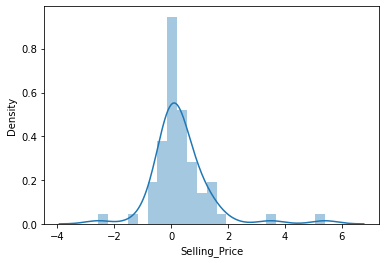

In [42]:
sns.distplot(y_test-predictions)
plt.show()

its just like gaussian distributution  so the model performed good

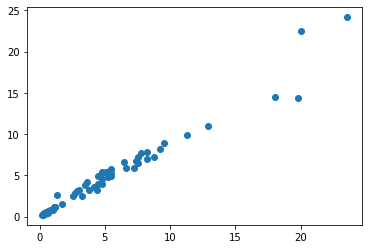

In [43]:
plt.scatter(y_test,predictions)
plt.show()